In [38]:
print('hi')

hi


In [39]:
#import matplotlib
%matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
#import ipympl
import matplotlib.font_manager

In [40]:
import agent_based_model as abm 
import importlib

In [41]:
sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)
#sns.set_context('notebook')
#sns.set_theme(palette='viridis')
#sns.set_context('talk')
#sns.set_style('whitegrid')

# debug here

In [42]:
if False:
    import json
    aparameters = { 
        'param': {'akey':123}
    }
    aparameters['param'] = json.dumps(aparameters['param'])
    aparameters['param'] = json.loads(aparameters['param'])
    # GUH stuck on 
    # AttributeError: 'str' object has no attribute 'read' 
    # bc i used load instead of loads. This library naming continues to be awful

In [43]:
#importlib.reload(abm)
#_,_,results = abm.run_custom_exp(viz=False)
#results = abm.run_default_model(viz=False)


In [44]:
#display(results)
#display(results.info)
#results.reporters
#results.info['time_stamp'][:19]

# fig 1

## fig 1 is just of the means shifted distirubtion

In [45]:
fig, ax = plt.subplots(2,1)

In [46]:
NOTIME= True

In [47]:
importlib.reload(abm)
if not NOTIME:
    fig = abm.BankExpsCollection.gen_fig_1()
    display(fig)

In [48]:
#!rm ~/.matplotlib/fontlist-v330.json
#!bat ~/.matplotlib/fontlist-v330.json

# fig 2

In [49]:
importlib.reload(abm)
if not NOTIME:
    fig = abm.BankExpsCollection.gen_fig_2()
    fig


# fig 3

## export data

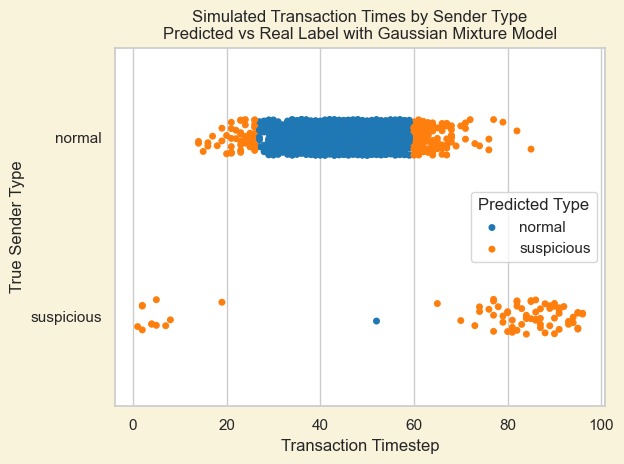

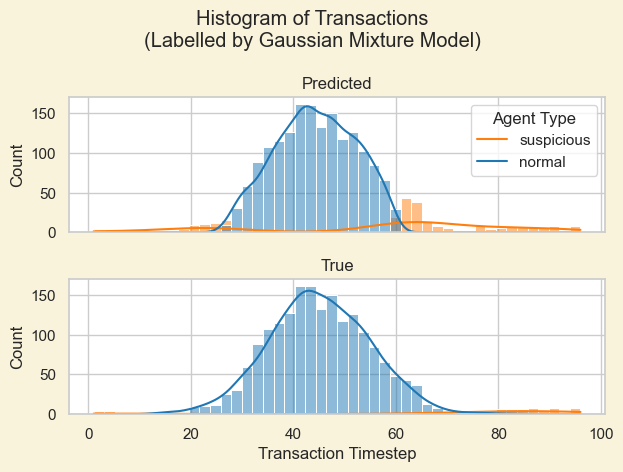

In [54]:
# outlier classifier: decision tree
importlib.reload(abm)
#abm.BankExpsCollection.gen_data_for_outlier_classif()
#abm.OutlierDetection.create_1d_X_from_files()
fig1, fig2 = abm.OutlierDetection.gen_gaussian_mixture_figs()
display(fig1)
display(fig2)


# fig 4

1740    0
280     0
69      0
1434    0
Name: y_true, dtype: int64


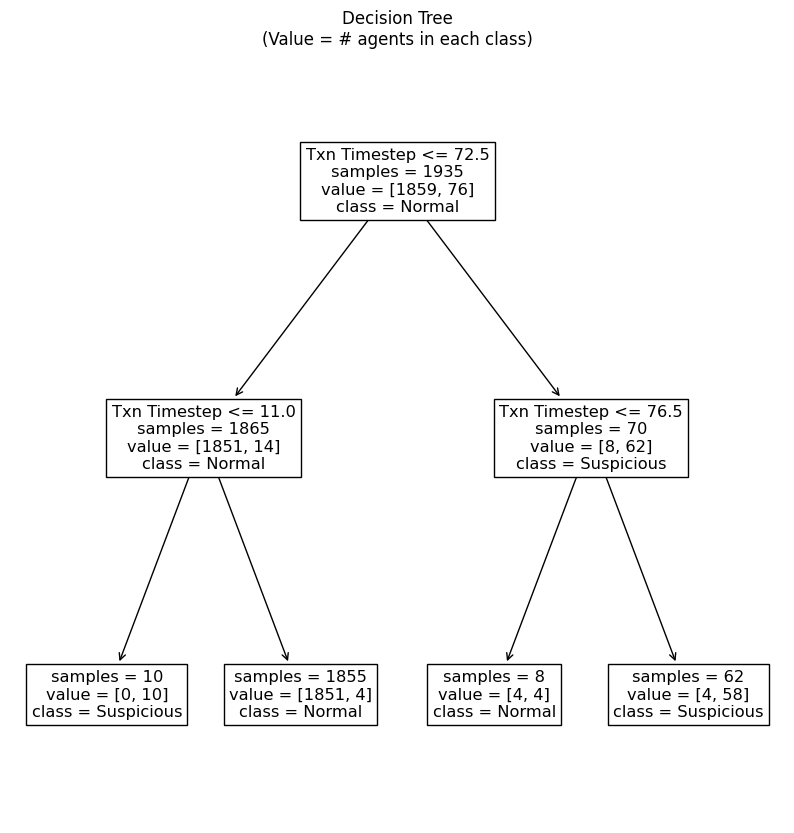

|--- agent type <= 72.50
|   |--- agent type <= 11.00
|   |   |--- weights: [0.00, 10.00] class: 1
|   |--- agent type >  11.00
|   |   |--- weights: [1851.00, 4.00] class: 0
|--- agent type >  72.50
|   |--- agent type <= 76.50
|   |   |--- weights: [4.00, 4.00] class: 0
|   |--- agent type >  76.50
|   |   |--- weights: [4.00, 58.00] class: 1



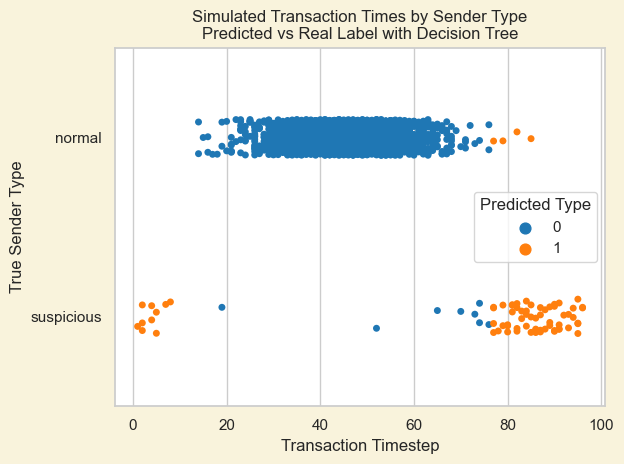

[Text(0.5, 0.8333333333333334, 'Txn Timestep <= 72.5\nsamples = 1935\nvalue = [1859, 76]\nclass = Normal'),
 Text(0.25, 0.5, 'Txn Timestep <= 11.0\nsamples = 1865\nvalue = [1851, 14]\nclass = Normal'),
 Text(0.125, 0.16666666666666666, 'samples = 10\nvalue = [0, 10]\nclass = Suspicious'),
 Text(0.375, 0.16666666666666666, 'samples = 1855\nvalue = [1851, 4]\nclass = Normal'),
 Text(0.75, 0.5, 'Txn Timestep <= 76.5\nsamples = 70\nvalue = [8, 62]\nclass = Suspicious'),
 Text(0.625, 0.16666666666666666, 'samples = 8\nvalue = [4, 4]\nclass = Normal'),
 Text(0.875, 0.16666666666666666, 'samples = 62\nvalue = [4, 58]\nclass = Suspicious')]

<function matplotlib.pyplot.show(close=None, block=None)>

In [76]:
importlib.reload(abm)
%matplotlib inline
(fig1, fig2) = abm.OutlierDetection.gen_tree_figs()
display(fig2)
display(fig1)
plt.show

# fig 5

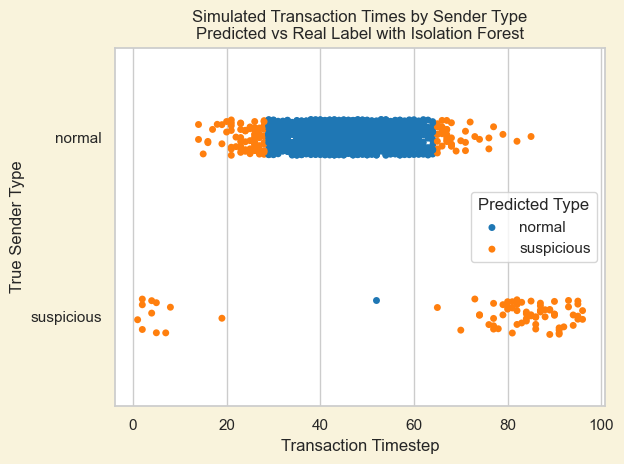

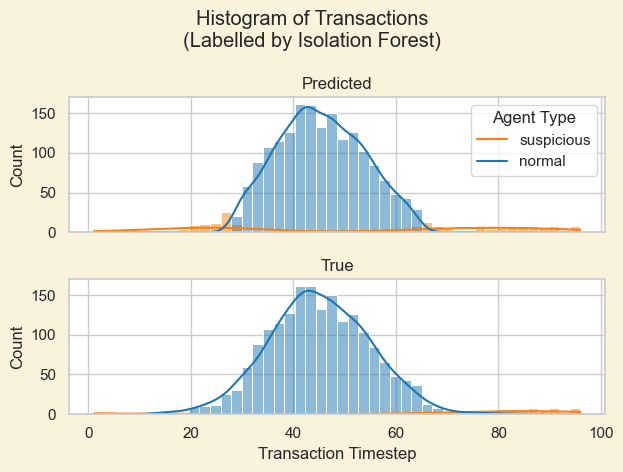

In [16]:
importlib.reload(abm)
(fig1, fig2) = abm.OutlierDetection.gen_isolation_figs()
#plt.show()
display(fig1)
display(fig2)

# try ap.experiment 

In [17]:
!mkdir results

mkdir: results: File exists


In [18]:
# fig 2 is of the varying # suspicious
importlib.reload(abm)
_,_,results = abm.BankExpsCollection.run_experiment()
#results = abm.run_default_model(viz=False)

created sample;  Sample of 3 parameter combinations
created exp;  <agentpy.experiment.Experiment object at 0x295f63280>
Scheduled runs: 1
{'normal': 1000, 'suspicious': 100}
Completed: 1, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:00.829548
ran exp;  DataDict {
'info': Dictionary with 12 keys
'parameters': 
    'constants': Dictionary with 12 keys
'reporters': DataFrame with 1 variable and 1 row
}


In [19]:
#import pandas as pd
#afoo = {'asbc': {1: 123}}
#bfoo = pd.DataFrame()
#afoo.unique()


    121 for col in df.columns:
    122     s = df[col]
--> 123     if len(s.unique()) == 1:
    124         fixed_pars[s.name] = df[col][0]
    125         df.drop(col, inplace=True, axis=1)

File ~/v3/lib/python3.10/site-packages/pandas/core/series


File ~/v3/lib/python3.10/site-packages/pandas/core/series.py:2088, in Series.unique(self)
   2030 def unique(self) -> ArrayLike:
   2031     """
   2032     Return unique values of Series object.
   2033 
   (...)
   2086     Categories (3, object): ['a' < 'b' < 'c']
   2087     """

In [ ]:
!cat agent_based_model.py | grep parameters_multi

# other

In [20]:
import agentpy as ap

In [21]:
NUM_AGENTS_PER_TYPE = {
    'normal': 1000,
    # 'suspicious': 10, 
}

# these are send, rcv pairs 
AGENT_TYPE_PAIR_PROBS = {
    'normal': {
        'self': 0.9,
        'suspicious': 0.1 },
    'suspicious': {
        'self': 0.7,
        'normal': 0.3
    } }

MEAN_TXN_HRS = {'normal': 14,
                'suspicious': 22}

MEAN_TXN_AMOUNTS = {'normal': 250,
                    'suspicious': 50}  # this shoudl actually vary...

MEAN_NUM_TXNS = { 'normal': 4, 
                    'suspicious': 10 }
MINS_PER_STEP = 15

parameters = {
    'mean_num_txns': MEAN_NUM_TXNS,
    'mean_txn_amounts': MEAN_TXN_AMOUNTS,
    'num_agents_per_type': NUM_AGENTS_PER_TYPE,
    'agent_type_pair_probs': AGENT_TYPE_PAIR_PROBS,
    'mean_txn_hrs': MEAN_TXN_HRS,
    'mean_txn_amounts ': MEAN_TXN_AMOUNTS,
    'mean_txns': 4,  # avg num txns each agent makes
    'starting_balance': 100,
    'seed': 42,
    'mins_per_step': MINS_PER_STEP,  # 1 hr
    'steps': int(24 * (60/MINS_PER_STEP)),  # 24 hours * steps per hr
# hardcode, since can't give combo of options between the two
    'percent_sus': 1/100,
}
# --- NOTE: Setting experiment here! 
parameters_multi = dict(parameters)
parameters_multi.update({
    'percent_sus': ap.Values(10, 1, 0.1),
    })
print('parameters sweep; ', parameters_multi, 'value ', parameters['percent_sus'])

sample = ap.Sample(parameters_multi) # grid search, each repeat 1x
print('created sample; ', sample)

parameters sweep;  {'mean_num_txns': {'normal': 4, 'suspicious': 10}, 'mean_txn_amounts': {'normal': 250, 'suspicious': 50}, 'num_agents_per_type': {'normal': 1000}, 'agent_type_pair_probs': {'normal': {'self': 0.9, 'suspicious': 0.1}, 'suspicious': {'self': 0.7, 'normal': 0.3}}, 'mean_txn_hrs': {'normal': 14, 'suspicious': 22}, 'mean_txn_amounts ': {'normal': 250, 'suspicious': 50}, 'mean_txns': 4, 'starting_balance': 100, 'seed': 42, 'mins_per_step': 15, 'steps': 96, 'percent_sus': Set of 3 parameter values} value  0.01
created sample;  Sample of 3 parameter combinations


In [22]:
sample

Sample of 3 parameter combinations

In [24]:
exp = ap.Experiment(abm.BankModel, sample, iterations=1)
print('created exp; ', exp)
#return exp
results = exp.run()
print('ran exp; ', results)
#results.save()

TypeError: unhashable type: 'dict'

In [ ]:
#fig, model, results = abm.run_(viz=True)
abm.BankExpsCollection.run_experiment()
#plt.tight_layout()
#plt.show()

In [ ]:
abm.Utility.export_data()

In [ ]:
#   

# isolation forest etc. 

In [ ]:
abm.